In [3]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import scipy.linalg

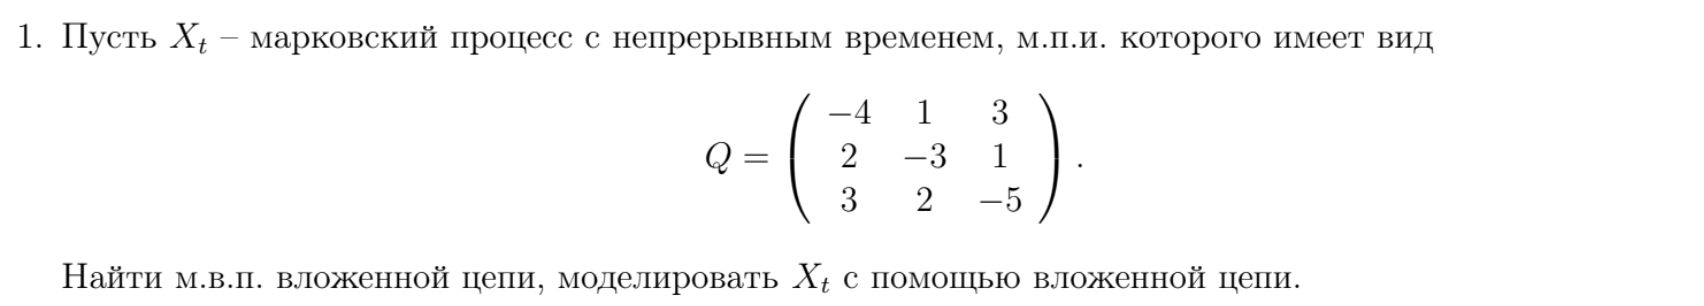

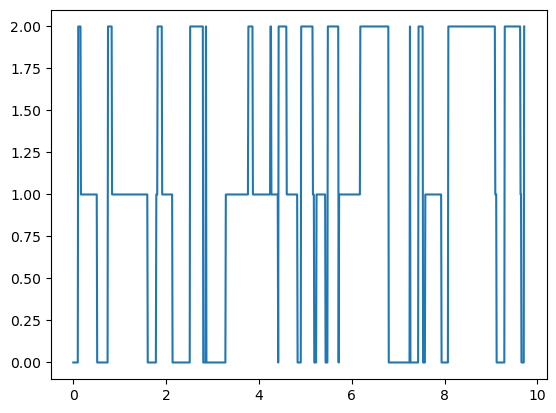

Траектория: [0, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2]
Время: [0.0, 0.08674254443652733, 0.08713053086507408, 0.10584089489414499, 0.16204190522922332, 0.5128129734462531, 0.7430414108627008, 0.8364443630706855, 1.59925341742453, 1.7827471670326571, 1.8111777808918479, 1.9119367583147697, 2.1345050126294405, 2.512510610372848, 2.8003145366123143, 2.857764667020151, 2.8629303653578346, 3.285350560460757, 3.7669694273849244, 3.865622567288294, 4.2428628085783435, 4.261960329254187, 4.407645519248636, 4.421805645071213, 4.592814957487269, 4.831269407809654, 4.906229001915565, 5.160808686265765, 5.192198169963048, 5.240602992626931, 5.43033635752703, 5.4767151623460295, 5.715264172560885, 5.721770238763562, 6.185641057420054, 6.795658001534866, 7.25058213739598, 7.259731102697199, 7.43468352928653, 7.534171112834164, 7.5852586072004256, 7.929529929860481, 8.074636308543859, 8.0800429

In [5]:
def prob_from_intensity(matrix):
    matrix_ = np.copy(matrix)
    for i in range(len(matrix)):
        test = np.abs(matrix[i, i])
        matrix_[i] = (matrix[i] / test)
        matrix_[i, i] = 0
    return matrix_

matrix_test = np.array([[-4, 1, 3],
                        [2, -3, 1],
                        [3, 2, -5]], dtype=float)

p = prob_from_intensity(matrix_test)

def get_trajectory(size, p, matrix):
    start_state = 0
    prev_state = start_state
    trajectory = [start_state]
    time = []
    
    while size > 1:
        state = prev_state
        time.append(sts.expon.rvs(scale=1/np.abs(matrix[state, state])))
        curr_state = np.random.choice(np.arange(len(p)), p=p[state])
        trajectory.append(curr_state)
        prev_state = curr_state
        size -= 1
    
    time = np.cumsum(time)
    bins = np.insert(time, 0, 0)
    
    return trajectory, bins

def func(x, trajectory, bins):
    return np.piecewise(x, [((bins[j-1] <= x) & (x < bins[j])) for j in range(1, len(bins))],
                        [trajectory[j-1] for j in range(1, len(bins))] + [trajectory[-1]])

size = 50
trajectory, bins = get_trajectory(size, p, matrix_test)
x = np.linspace(0, np.max(bins), 1000)
y = func(x, trajectory, bins)
plt.plot(x, y)
plt.show()
print(f"Траектория: {trajectory}\nВремя: {list(bins)}")

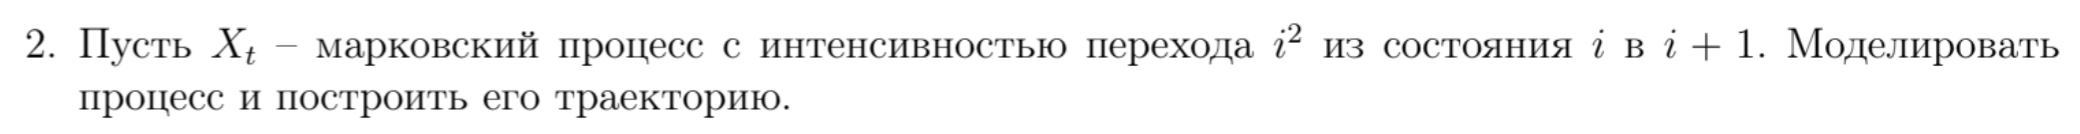

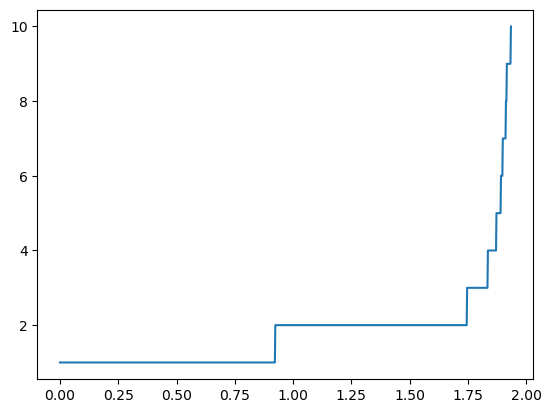

Траектория: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Время: [0.0, 0.9224641059267356, 1.7457723035255288, 1.834121643361152, 1.8707754305500934, 1.8916452772204515, 1.8984388243798727, 1.9112897087773757, 1.9152454387942603, 1.9345227833375924]


In [238]:
def get_trajectory_2(size):
    start_state = 1
    prev_state = start_state
    trajectory = [start_state]
    time = []
    
    while size > 1:
        state = prev_state
        time.append(sts.expon.rvs(scale=np.abs(1 / state**2)))
        curr_state = state + 1
        trajectory.append(curr_state)
        prev_state = curr_state
        size -= 1
    
    time = np.cumsum(time)
    bins = np.insert(time, 0, 0)
    
    return trajectory, bins
trajectory, bins = get_trajectory_2(10)
x = np.linspace(0, np.max(bins), 1000)
y = func(x, trajectory, bins)
plt.plot(x, y)
plt.show()
print(f"Траектория: {trajectory}\nВремя: {list(bins)}")

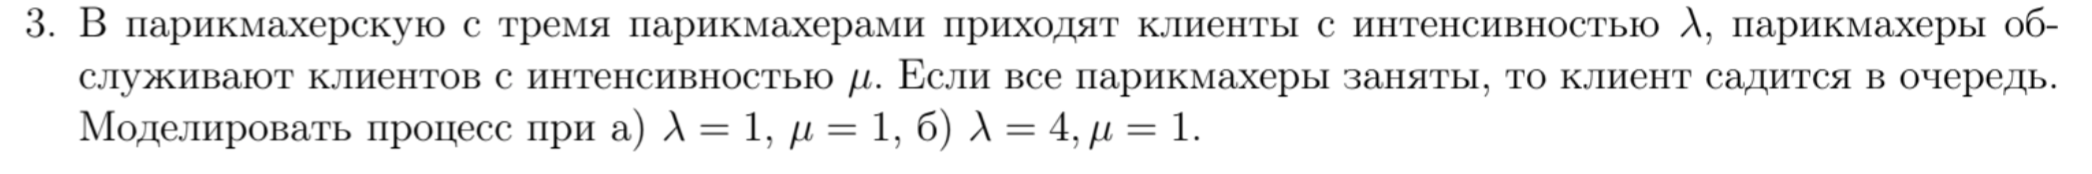

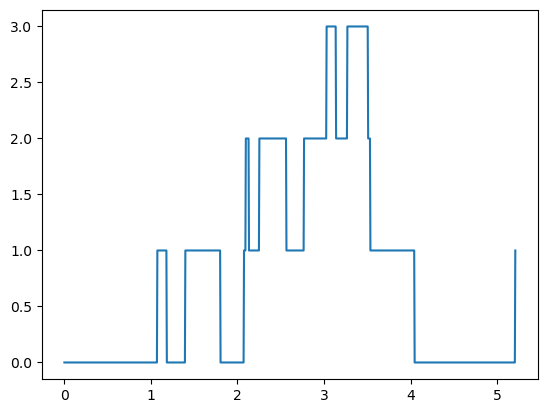

Траектория: [0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1]
Время: [0.0, 1.0717521085966386, 1.1799865645978516, 1.397550592399572, 1.8002338339006698, 2.072575290897893, 2.0963035173978914, 2.1291342184198925, 2.2487224448328593, 2.5625376190060623, 2.7657291858348927, 3.0294640814612617, 3.13896976072663, 3.268534096764283, 3.5060077949358925, 3.5332801174627426, 3.956344214467829, 3.9568028649585583, 4.044013098148063, 5.209673638301698]


In [12]:
def get_trajectory_3(lambda_, mu_, size):
    start_state = 0
    prev_state = start_state
    trajectory = [start_state]
    time = []
    
    while size > 1:
        state = prev_state
        if state == 0:
            time_test = lambda_
            curr_state = 1
        elif state == 1:
            time_test = lambda_ + mu_
            curr_state = np.random.choice([0, 2], p=[mu_/time_test, 
                                                     lambda_/time_test])
        elif state == 2:
            time_test = lambda_ + 2*mu_
            curr_state = np.random.choice([1, 3], p=[2*mu_/time_test,
                                                        lambda_/time_test])
        else:
            time_test = lambda_ + 3*mu_
            curr_state = np.random.choice([state-1, state+1], 
                                          p=[3*mu_/time_test,
                                             lambda_/time_test])

        time.append(sts.expon.rvs(scale=np.abs(1 / time_test**2)))
        trajectory.append(curr_state)
        prev_state = curr_state
        size -= 1
    time = np.cumsum(time)
    bins = np.insert(time, 0, 0)
    return trajectory, bins

lambda_, mu_ = 1, 1
trajectory, bins = get_trajectory_3(lambda_, mu_, 20)
x = np.linspace(0, np.max(bins), 1000)
y = func(x, trajectory, bins)
plt.plot(x, y)
plt.show()
print(f"Траектория: {trajectory}\nВремя: {list(bins)}")

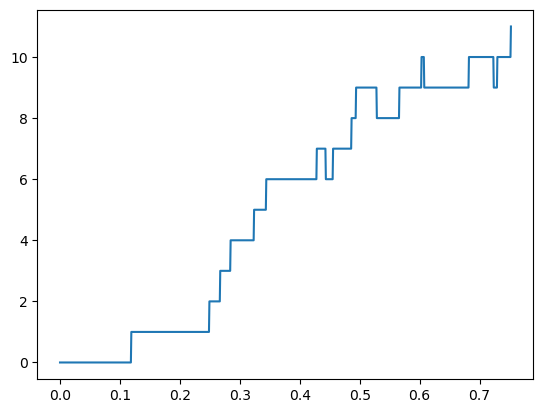

Траектория: [0, 1, 2, 3, 4, 5, 6, 7, 6, 7, 8, 9, 8, 9, 10, 9, 10, 9, 10, 11]
Время: [0.0, 0.11872093743501423, 0.2491348651324053, 0.2670114722143802, 0.2844018825351174, 0.32307666031560595, 0.3439190951532425, 0.4280942868050664, 0.44337466875013853, 0.4551844077873732, 0.48609508562817233, 0.4932104206882419, 0.5280394355862259, 0.5657480037089851, 0.6026674061450522, 0.6071132543957665, 0.6820140294876935, 0.7232490524439257, 0.7290625335549163, 0.752213986942266]


In [15]:
lambda_, mu_ = 4, 1
trajectory, bins = get_trajectory_3(lambda_, mu_, 20)
x = np.linspace(0, np.max(bins), 1000)
y = func(x, trajectory, bins)
plt.plot(x, y)
plt.show()
print(f"Траектория: {trajectory}\nВремя: {list(bins)}")

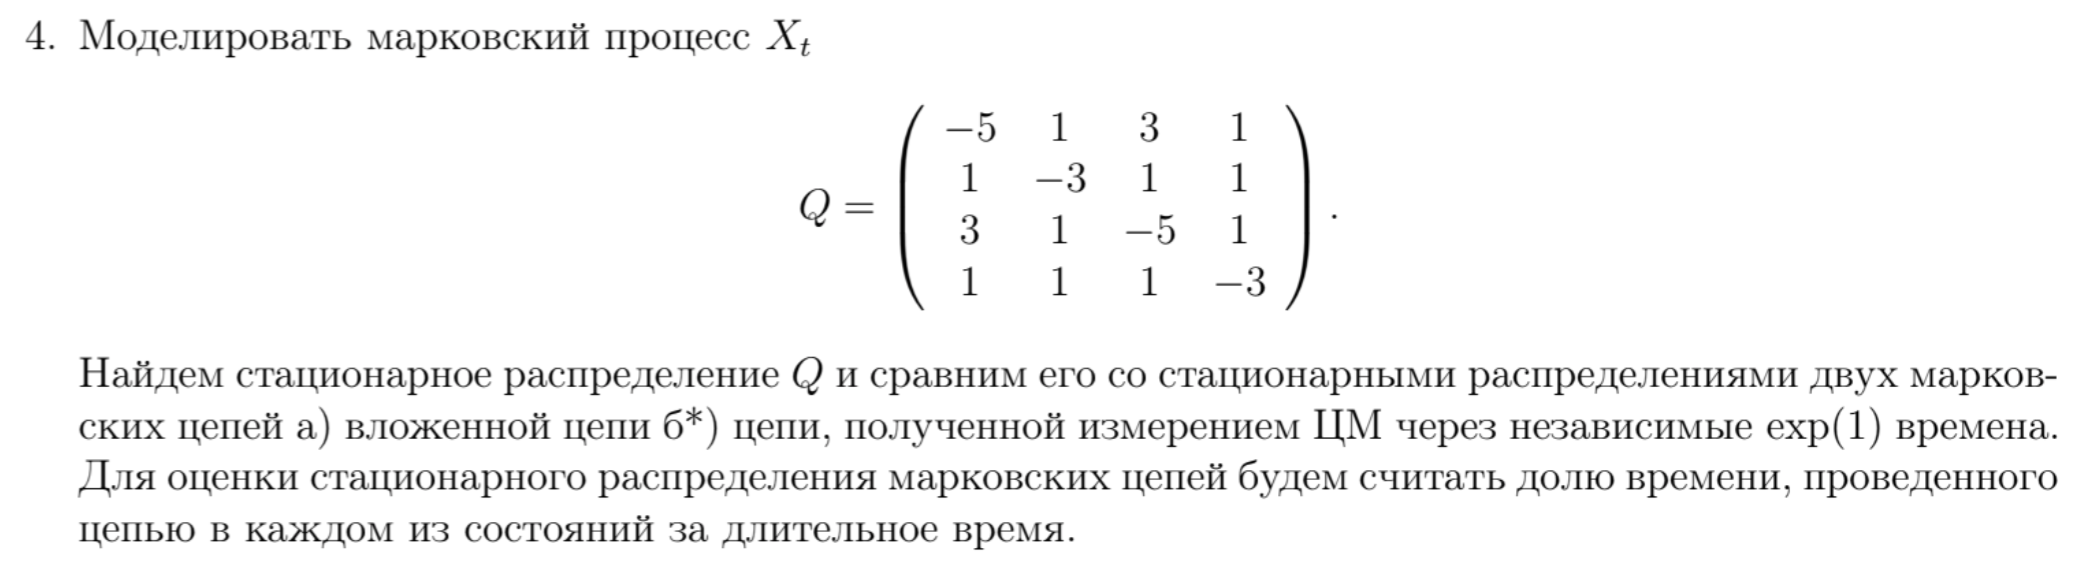

In [15]:
def find_stationary(matrix):
    eig_val, eig_vecs = np.linalg.eig(matrix.T)
    res = (eig_vecs[:,np.isclose(eig_val, 1)][:,0]
           / eig_vecs[:,np.isclose(eig_val, 1)][:,0].sum()).real
    return res

In [16]:
matrix = np.array([[-5,1,3,1],
                  [1,-3,1,1],
                  [3,1,-5,1],
                  [1,1,1,-3]], dtype=float)
p = prob_from_intensity(matrix)

size = 10000
trajectory, bins = get_trajectory(size, p, matrix)
x = np.linspace(0, np.max(bins), 1000)
# y = func(x, trajectory, bins)
# plt.plot(x, y)
# plt.show()
# print(f"Траектория: {trajectory}")

In [21]:
null_space = abs(scipy.linalg.null_space(matrix)).ravel()
q_stat = null_space/null_space.sum()
p_stat = find_stationary(p)

time_states = np.zeros(4)
time_total = 0
state = 0
states = [0,0,0,0]
while time_total <= bins[-1]:
    time = sts.expon.rvs(1)
    time_states[state] += time
    time_total += time
    idx = np.digitize(time_total, bins)
    states[state] += 1
    state = trajectory[idx-1]
    
time_states /= time_states.sum()

print(f"Stationary for Q: {q_stat}")
print(f"Stationary for P: {p_stat}")
# print(f"Approximated stationary for P*: {time_states}")
print(f"Approximated stationary for P*: {states/np.sum(states)}")

Stationary for Q: [0.25 0.25 0.25 0.25]
Stationary for P: [0.3125 0.1875 0.3125 0.1875]
Approximated stationary for P*: [0.27569331 0.24632953 0.2365416  0.24143556]


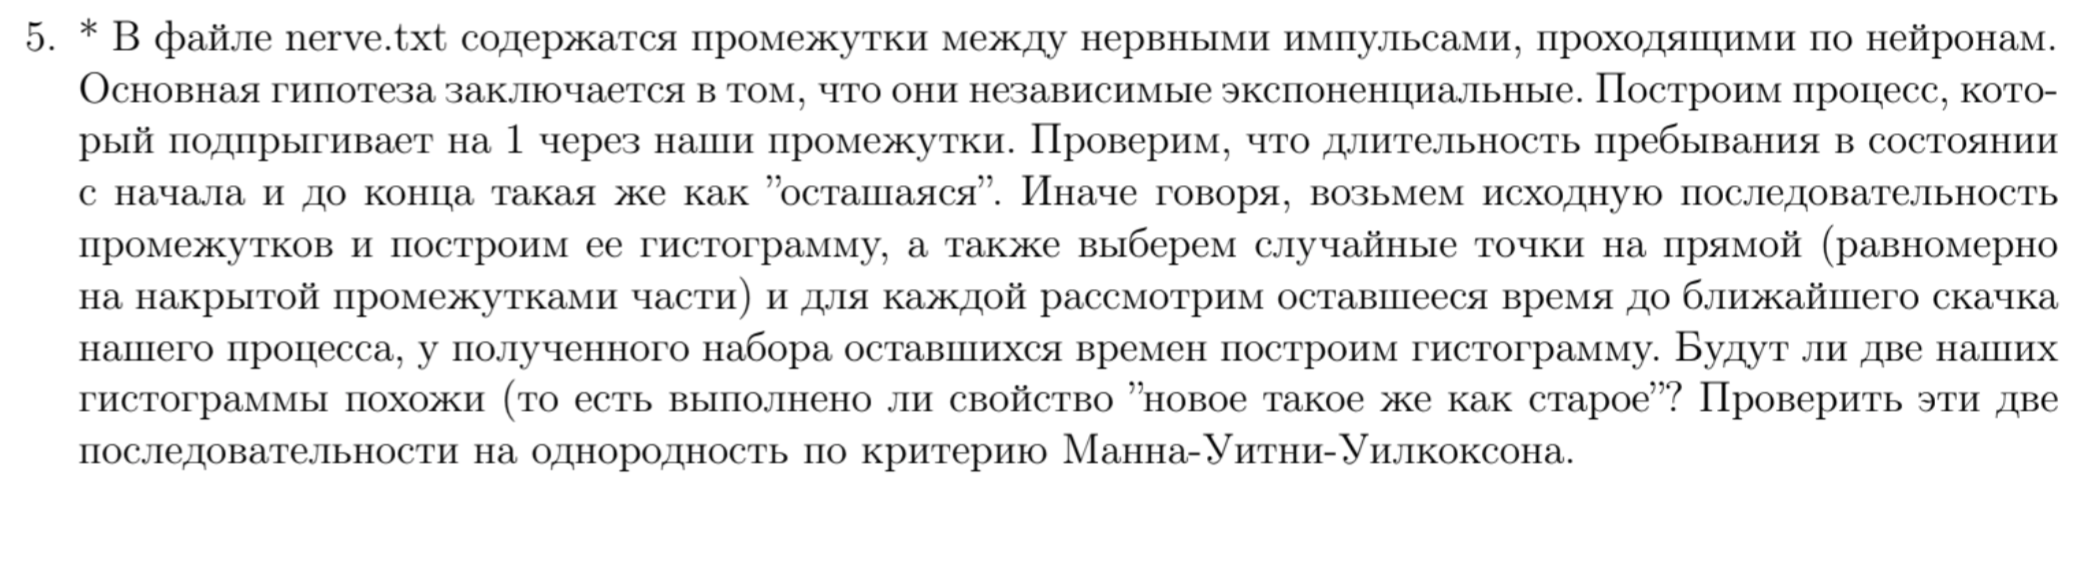

<Axes: ylabel='Density'>

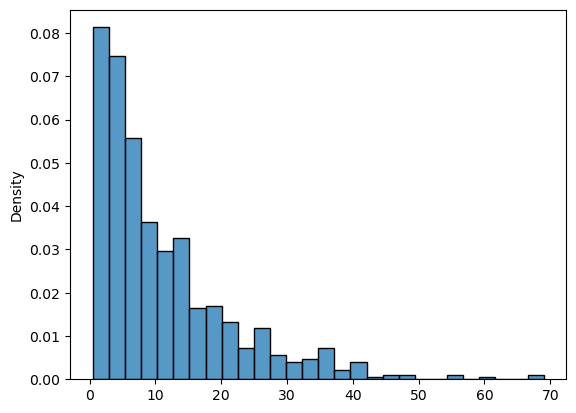

In [24]:
data = np.loadtxt('nerve.txt', dtype = float)
sb.histplot(data, stat = 'density')

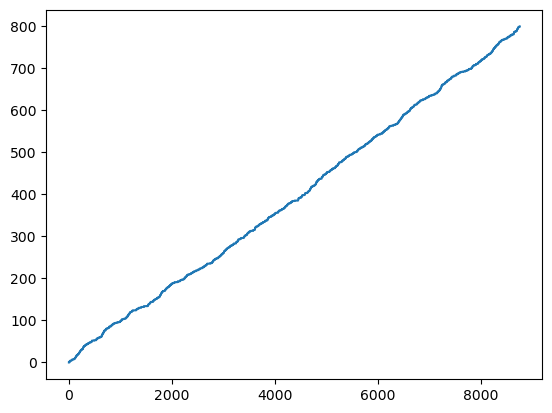

In [25]:
def func(x, trajectory, bins):
    return np.piecewise(x, [((bins[j-1] <= x) & (x < bins[j])) for j in range(1, len(bins))],
                        [trajectory[j-1] for j in range(1, len(bins))] + [trajectory[-1]])
bins = np.insert(np.cumsum(data), 0, 0)
trajectory = np.arange(len(bins))

x = np.linspace(0, np.max(bins), 10000)
y = func(x, trajectory, bins)
plt.plot(x, y)
plt.show()

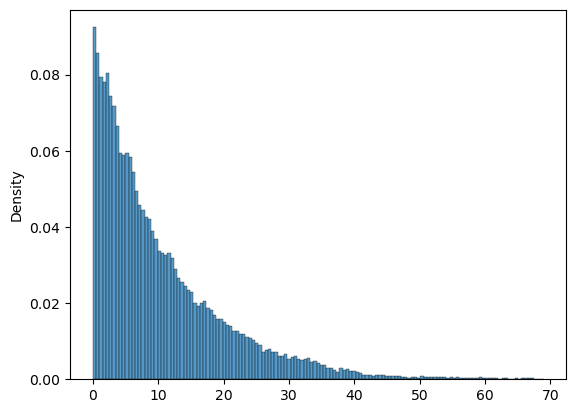

In [26]:
right_corner = np.max(data)
size = len(data)
result = np.empty(0)
values = sts.uniform.rvs(loc = 0, scale = right_corner, size = size)
for i in range(size):
    test = data - values[i]
    positive_subarray = test[test >= 0]
    result = np.append(result, positive_subarray)
sb.histplot(result, stat = 'density')
plt.show()

In [29]:
p = sts.mannwhitneyu(data, result).pvalue
print(f"Можно ли принять гипотезу 'похожести'? {p}")

Можно ли принять гипотезу 'похожести'? 0.1456032784876562
